### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [1]:
import tensorflow as tf
tf.set_random_seed(42)

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers

In [3]:
tf.__version__

'1.13.1'

### Collect Data

In [4]:
import keras

Using TensorFlow backend.


In [3]:
(trainX, trainY),(testX, testY) = tf.keras.datasets.mnist.load_data()



Using TensorFlow backend.


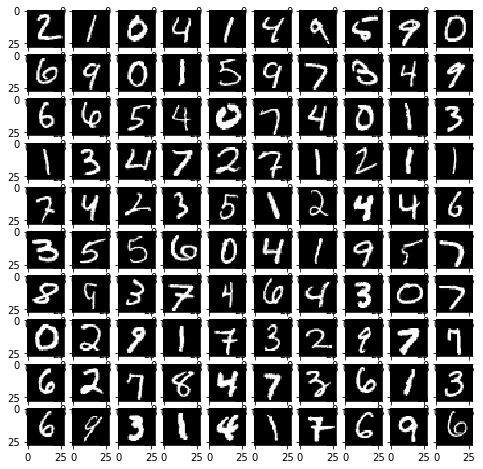

### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [6]:
(trainX, trainY),(testX, testY) = tf.keras.datasets.mnist.load_data()

In [7]:
trainY = tf.keras.utils.to_categorical(trainY,num_classes=10)

In [8]:
testY = tf.keras.utils.to_categorical(testY,num_classes=10)

In [9]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [14]:
trainX = trainX / 255.0

testX = testX / 255.0

### Visualize the data

Plot first 10 images in the triaining set and their labels.

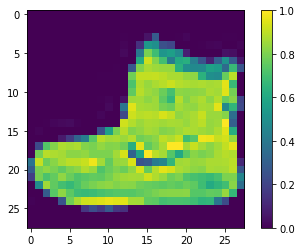

In [15]:
plt.figure()
plt.imshow(trainX[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [16]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

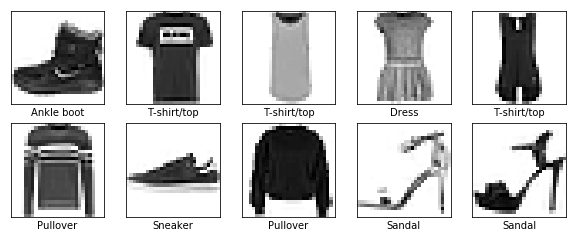

In [18]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [43]:
model = tf.keras.Sequential()

In [44]:
model.add(layers.Dense(10,input_shape=(784,),activation='softmax'))


In [45]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [46]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


### Execute the model using model.fit()

In [48]:

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))
model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=30,
          batch_size=32)

ValueError: Error when checking input: expected dense_1_input to have 2 dimensions, but got array with shape (60000, 28, 28)

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [49]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

In [50]:
#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)

#Compile the model
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [51]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_v1 (Batc (None, 784)               3136      
Total params: 3,136
Trainable params: 1,568
Non-trainable params: 1,568
_________________________________________________________________


### Execute the model

In [52]:
model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=10,
          batch_size=32)

ValueError: A target array with shape (60000, 10) was passed for an output of shape (None, 784) while using as loss `categorical_crossentropy`. This loss expects targets to have the same shape as the output.

### Customize the learning rate to 0.001 in sgd optimizer and run the model

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

## Review model

### Run the model